<a href="https://colab.research.google.com/github/sudeshnabose95/pipedream/blob/master/Sudeshna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
from IPython.display import Image

In [4]:
uploaded = files.upload()

Saving lung_image_HUc19a.npy to lung_image_HUc19a.npy


In [ ]:
import numpy as np
import tensorflow as tf

In [5]:
import numpy as np

img_array = np.load('lung_image_HUc19a.npy')

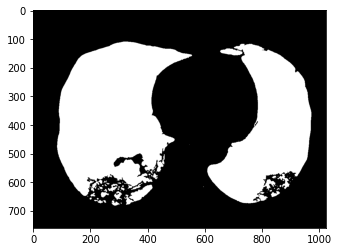

In [6]:
import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2

#img = io.imread("img_array", as_gray=True)
plt.imshow(img_array, cmap='gray')
plt.show()

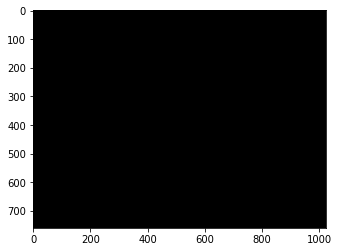

In [7]:
#Variance 
from scipy import ndimage 
k=7
img_mean = ndimage.uniform_filter(img_array, (k, k))
img_sqr_mean = ndimage.uniform_filter(img_array**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

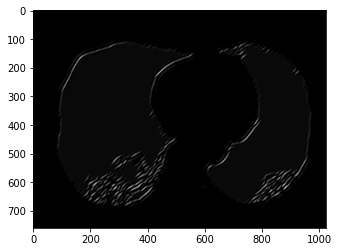

In [8]:
#GABOR - A great filter for texture but usually efficient


ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img_array, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int32 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)


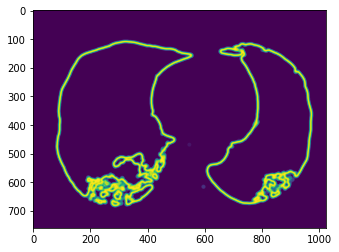

In [9]:
#Entropy
#Entropy quantifies disorder.

from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img_array, disk(7))
plt.imshow(entropy_img)

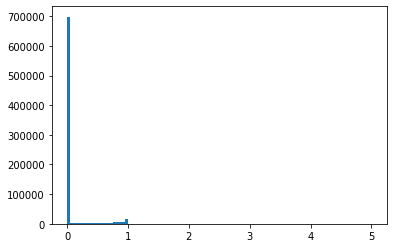

In [10]:
#Scratch Analysis - single image
#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)

thresh = threshold_otsu(entropy_img)


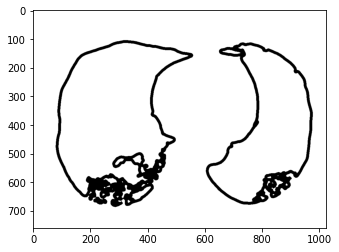

In [11]:
#Now let us binarize the entropy image 
binary = entropy_img <= thresh
plt.imshow(binary,cmap='gray')

In [ ]:

#Sum all pixels in the scratch region (values =1)
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

Scratched area is:  965546 Square pixels
Scratched area in sq. microns is:  195523.065 Square pixels


In [ ]:
thresh

0.3808470001507459